# Get closed shell species to calculate
Find those without QM whose radical has large GAV error

In [1]:
import sys
sys.path.insert(0, "/home/gridsan/hwpang/Software/RMG-Py/")
sys.path.insert(0, "..")

import yaml
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt

from tree.parameters import columns

# Load data to join

In [10]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")
resonance_radical_gav_df = pd.read_csv("../data/resonance_radical_gav.csv")

In [11]:
hbi_unc_df

,radical_smiles,resonance_radical_smiles,resonance_radical_num_rotatable_bonds,radical_H298 (kcal/mol),radical_Sint298 (cal/mol/K),radical_source,radical_level_of_theory,radical_Cp300 (cal/mol/K),radical_Cp400 (cal/mol/K),radical_Cp500 (cal/mol/K),...,unc_closed_shell_Cp1500 (cal/mol/K),unc_HBI_H298 (kcal/mol),unc_HBI_Sint298 (cal/mol/K),unc_HBI_Cp300 (cal/mol/K),unc_HBI_Cp400 (cal/mol/K),unc_HBI_Cp500 (cal/mol/K),unc_HBI_Cp600 (cal/mol/K),unc_HBI_Cp800 (cal/mol/K),unc_HBI_Cp1000 (cal/mol/K),unc_HBI_Cp1500 (cal/mol/K)
0,[O]C(=O)OC(O)(O)O,[O]C(=O)OC(O)(O)O,4,-223.514126,95.999974,dong_pio_liang.py,CBS-QB3,33.926878,38.387673,41.508496,...,2.0,5.2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,[O]C(O)(O)OC(=O)O,[O]C(O)(O)OC(=O)O,3,-223.423390,92.781436,dong_pio_liang.py,CBS-QB3,32.531179,37.569659,41.498443,...,2.0,5.2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,O=C(O)O[C](O)O,O=C(O)O[C](O)O,3,-187.322869,89.517068,dong_pio_liang.py,CBS-QB3,28.973242,34.553073,38.746721,...,2.0,5.2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,CC(=O)OC(OO)C(=O)C(O)O[O],CC(=O)OC(OO)C(=O)C(O)O[O],8,-185.660577,132.633380,dong_pio_liang.py,CBS-QB3,56.569703,66.028226,73.603744,...,2.0,5.2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,O=[C]OC(O)(O)O,O=[C]OC(O)(O)O,5,-180.497563,90.031975,dong_pio_liang.py,CBS-QB3,32.378191,36.844343,39.334179,...,2.0,5.2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,C1=C[CH]C=1,[C]1=CC=C1,0,156.106582,65.385768,dong_pio_liang.py,CBS-QB3,14.653111,18.488757,21.562144,...,2.0,5.2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2985,C=C=C1C=[C]C1,C=C=C1C=[C]C1,0,157.733085,77.587625,dong_pio_liang.py,CBS-QB3,22.675255,28.333884,32.976246,...,2.0,5.2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2986,[CH2]C1=CC#CC1,[CH2]C1=CC#CC1,1,163.498344,75.963844,dong_pio_liang.py,CBS-QB3,22.606638,28.495118,33.391100,...,2.0,5.2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2987,[CH2]C1=CC#CC1,C=C1[CH]C#CC1,0,163.498344,75.963844,dong_pio_liang.py,CBS-QB3,22.606638,28.495118,33.391100,...,2.0,5.2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [8]:
resonance_radical_gav_df

,smiles,H298 (kcal/mol),S298 (cal/mol/K),Sint298 (cal/mol/K),Cp300 (cal/mol/K),Cp400 (cal/mol/K),Cp500 (cal/mol/K),Cp600 (cal/mol/K),Cp800 (cal/mol/K),Cp1000 (cal/mol/K),Cp1500 (cal/mol/K),comment
0,[O]C(=O)OC(O)(O)O,-214.562847,98.463056,102.023652,29.530765,33.696922,37.199809,39.860612,43.945698,46.705583,51.100899,Thermo group additivity estimation: group(O2s-...
1,[O]C(O)(O)OC(=O)O,-218.506442,100.780822,100.780822,28.957151,32.645296,36.363289,39.621606,44.949522,48.354723,52.797839,Thermo group additivity estimation: group(O2s-...
2,O=C(O)O[C](O)O,-182.366843,95.359992,96.737419,26.444474,30.605583,34.122333,36.909560,40.899044,43.401300,45.798700,Thermo group additivity estimation: group(O2s-...
3,CC(=O)OC(OO)C(=O)C(O)O[O],-198.122312,145.818548,145.246864,50.656616,59.598776,67.892505,73.980363,82.723365,90.133078,97.599981,Thermo group additivity estimation: group(O2s-...
4,O=[C]OC(O)(O)O,-169.366862,91.656926,93.840096,27.460975,30.914895,33.801147,36.038910,39.770268,42.499082,46.915908,Thermo group additivity estimation: group(O2s-...
...,...,...,...,...,...,...,...,...,...,...,...,...
2862,[C]1=CC=C1,156.830500,62.382873,63.760300,15.164000,18.710000,21.534000,23.741000,26.989000,29.289000,32.814000,Thermo group additivity estimation: group(Cds-...
2863,C=C=C1C=[C]C1,151.763874,52.204958,53.582385,22.076919,28.279266,33.060461,36.665145,41.822263,45.330044,50.563950,Thermo group additivity estimation: group(Cs-(...
2864,[CH2]C1=CC#CC1,160.124000,71.590000,71.590000,22.319000,28.397000,32.609000,37.198000,43.459000,47.876000,52.869000,Thermo group additivity estimation: group(Cs-(...
2865,C=C1[CH]C#CC1,183.114000,79.630000,79.630000,21.319000,26.687000,31.089000,35.058000,41.669000,46.126000,50.759000,Thermo group additivity estimation: group(Cs-(...


# Join table

In [16]:
error_df = resonance_radical_df[["radical_smiles", "resonance_radical_smiles"]]
error_df.merge(temp_radical_data_df, on="radical_smiles", how="left")

,radical_smiles,resonance_radical_smiles,radical_H298 (kcal/mol),radical_Sint298 (cal/mol/K),radical_source,radical_level_of_theory,radical_Cp300 (cal/mol/K),radical_Cp400 (cal/mol/K),radical_Cp500 (cal/mol/K),radical_Cp600 (cal/mol/K),radical_Cp800 (cal/mol/K),radical_Cp1000 (cal/mol/K),radical_Cp1500 (cal/mol/K)
0,[O]C(=O)OC(O)(O)O,[O]C(=O)OC(O)(O)O,-223.514126,95.999974,dong_pio_liang.py,CBS-QB3,33.926878,38.387673,41.508496,44.062390,47.779730,50.089328,52.510168
1,[O]C(O)(O)OC(=O)O,[O]C(O)(O)OC(=O)O,-223.423390,92.781436,dong_pio_liang.py,CBS-QB3,32.531179,37.569659,41.498443,44.710460,49.355989,52.184758,54.821371
2,O=C(O)O[C](O)O,O=C(O)O[C](O)O,-187.322869,89.517068,dong_pio_liang.py,CBS-QB3,28.973242,34.553073,38.746721,41.655671,45.237515,47.423507,49.461069
3,CC(=O)OC(OO)C(=O)C(O)O[O],CC(=O)OC(OO)C(=O)C(O)O[O],-185.660577,132.633380,dong_pio_liang.py,CBS-QB3,56.569703,66.028226,73.603744,79.772844,88.705511,94.174908,99.503777
4,O=[C]OC(O)(O)O,O=[C]OC(O)(O)O,-180.497563,90.031975,dong_pio_liang.py,CBS-QB3,32.378191,36.844343,39.334179,41.301130,44.143726,45.893560,47.744589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,C1=C[CH]C=1,[C]1=CC=C1,156.106582,65.385768,dong_pio_liang.py,CBS-QB3,14.653111,18.488757,21.562144,23.855179,27.322032,29.749165,33.017640
2863,C=C=C1C=[C]C1,C=C=C1C=[C]C1,157.733085,77.587625,dong_pio_liang.py,CBS-QB3,22.675255,28.333884,32.976246,36.811783,42.847715,47.149236,53.155423
2864,[CH2]C1=CC#CC1,[CH2]C1=CC#CC1,163.498344,75.963844,dong_pio_liang.py,CBS-QB3,22.606638,28.495118,33.391100,37.327959,43.401164,47.644478,53.388267
2865,[CH2]C1=CC#CC1,C=C1[CH]C#CC1,163.498344,75.963844,dong_pio_liang.py,CBS-QB3,22.606638,28.495118,33.391100,37.327959,43.401164,47.644478,53.388267


In [3]:
resonance_radical_gav_df = pd.read_csv("../data/radical_resonance_gav.csv")
resonance_radical_gav_df

,resonance_smiles,H298 (kcal/mol),S298 (cal/mol/K),Sint298 (cal/mol/K),Cp300 (cal/mol/K),Cp400 (cal/mol/K),Cp500 (cal/mol/K),Cp600 (cal/mol/K),Cp800 (cal/mol/K),Cp1000 (cal/mol/K),Cp1500 (cal/mol/K),comment
0,[O]C(=O)OC(O)(O)O,-214.562847,98.463056,102.023652,29.530765,33.696922,37.199809,39.860612,43.945698,46.705583,51.100899,Thermo group additivity estimation: group(O2s-...
1,[O]C(O)(O)OC(=O)O,-218.506442,100.780822,100.780822,28.957151,32.645296,36.363289,39.621606,44.949522,48.354723,52.797839,Thermo group additivity estimation: group(O2s-...
2,O=C(O)O[C](O)O,-182.366843,95.359992,96.737419,26.444474,30.605583,34.122333,36.909560,40.899044,43.401300,45.798700,Thermo group additivity estimation: group(O2s-...
3,CC(=O)OC(OO)C(=O)C(O)O[O],-198.122312,145.818548,145.246864,50.656616,59.598776,67.892505,73.980363,82.723365,90.133078,97.599981,Thermo group additivity estimation: group(O2s-...
4,O=[C]OC(O)(O)O,-169.366862,91.656926,93.840096,27.460975,30.914895,33.801147,36.038910,39.770268,42.499082,46.915908,Thermo group additivity estimation: group(O2s-...
...,...,...,...,...,...,...,...,...,...,...,...,...
2862,[C]1=CC=C1,156.830500,62.382873,63.760300,15.164000,18.710000,21.534000,23.741000,26.989000,29.289000,32.814000,Thermo group additivity estimation: group(Cds-...
2863,C=C=C1C=[C]C1,151.763874,52.204958,53.582385,22.076919,28.279266,33.060461,36.665145,41.822263,45.330044,50.563950,Thermo group additivity estimation: group(Cs-(...
2864,[CH2]C1=CC#CC1,160.124000,71.590000,71.590000,22.319000,28.397000,32.609000,37.198000,43.459000,47.876000,52.869000,Thermo group additivity estimation: group(Cs-(...
2865,C=C1[CH]C#CC1,183.114000,79.630000,79.630000,21.319000,26.687000,31.089000,35.058000,41.669000,46.126000,50.759000,Thermo group additivity estimation: group(Cs-(...


In [4]:
error_df = pd.DataFrame()
error_df["radical_resonance_smiles"] = resonance_radical_gav_df["resonance_smiles"]
error_df["closed_shell_smiles"] = hbi_df["closed_shell_smiles"]
error_df["closed_shell_thermo_source"] = hbi_df["closed_shell_thermo_source"]
temp_columns = ["radical_" + column for column in columns]
error_df[columns] = resonance_radical_gav_df[columns].values - hbi_df[temp_columns].values
error_df

,radical_resonance_smiles,closed_shell_smiles,closed_shell_thermo_source,H298 (kcal/mol),S298 (cal/mol/K),Sint298 (cal/mol/K),Cp300 (cal/mol/K),Cp400 (cal/mol/K),Cp500 (cal/mol/K),Cp600 (cal/mol/K),Cp800 (cal/mol/K),Cp1000 (cal/mol/K),Cp1500 (cal/mol/K)
0,[O]C(=O)OC(O)(O)O,O=C(O)OC(O)(O)O,GAV,8.951279,4.646252,6.023678,-4.396114,-4.690752,-4.308687,-4.201778,-3.834032,-3.383745,-1.409269
1,[O]C(O)(O)OC(=O)O,O=C(O)OC(O)(O)O,GAV,4.916949,7.999386,7.999386,-3.574028,-4.924363,-5.135155,-5.088854,-4.406467,-3.830035,-2.023532
2,O=C(O)O[C](O)O,O=C(O)OC(O)O,GAV,4.956026,7.220350,7.220350,-2.528768,-3.947490,-4.624389,-4.746110,-4.338471,-4.022207,-3.662369
3,CC(=O)OC(OO)C(=O)C(O)O[O],CC(=O)OC(OO)C(=O)C(O)OO,GAV,-12.461735,12.613484,12.613484,-5.913088,-6.429450,-5.711239,-5.792481,-5.982146,-4.041830,-1.903796
4,O=[C]OC(O)(O)O,O=COC(O)(O)O,GAV,11.130700,3.808121,3.808121,-4.917216,-5.929449,-5.533032,-5.262220,-4.373458,-3.394478,-0.828680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,[C]1=CC=C1,C1=CC=C1,GAV,0.723918,-1.625468,-1.625468,0.510889,0.221243,-0.028144,-0.114179,-0.333032,-0.460165,-0.203640
2863,C=C=C1C=[C]C1,C=C=C1C=CC1,GAV,-5.969211,-24.005240,-24.005240,-0.598337,-0.054619,0.084215,-0.146638,-1.025452,-1.819192,-2.591473
2864,[CH2]C1=CC#CC1,CC1=CC#CC1,GAV,-3.374344,-2.996417,-4.373844,-0.287638,-0.098118,-0.782100,-0.129959,0.057836,0.231522,-0.519267
2865,C=C1[CH]C#CC1,C=C1CC#CC1,GAV,19.615656,5.043583,3.666156,-1.287638,-1.808118,-2.302100,-2.269959,-1.732164,-1.518478,-2.629267


In [5]:
error_df = error_df[error_df["closed_shell_thermo_source"]=="GAV"]
len(error_df.index)

1864

In [6]:
error_df = error_df[error_df["H298 (kcal/mol)"] > 1.5]
len(error_df.index)

689

In [7]:
sorted_error_df = error_df.sort_values(by='H298 (kcal/mol)', key=abs, ascending=False)
sorted_error_df

,radical_resonance_smiles,closed_shell_smiles,closed_shell_thermo_source,H298 (kcal/mol),S298 (cal/mol/K),Sint298 (cal/mol/K),Cp300 (cal/mol/K),Cp400 (cal/mol/K),Cp500 (cal/mol/K),Cp600 (cal/mol/K),Cp800 (cal/mol/K),Cp1000 (cal/mol/K),Cp1500 (cal/mol/K)
2163,[O]C1=C=COO1,OC1=C=COO1,GAV,75.801694,1.517186,1.517186,2.233072,2.861844,2.363665,1.893326,1.713996,1.632359,0.874569
2728,C[CH]C1=C=COO1,CCC1=C=COO1,GAV,63.892917,7.025984,7.025984,0.024906,1.340391,1.116434,0.704009,0.715337,0.666155,-0.353776
1050,[O]C1=C(O)O1,OC1=C(O)O1,GAV,60.327034,2.123338,2.123338,3.210310,2.243190,1.335399,0.621080,0.091582,-0.256516,-0.838492
174,[O]C12OC1(O)O2,OC12OC1(O)O2,GAV,58.052698,3.017115,3.017115,-0.561745,-2.051411,-2.396519,-2.418233,-1.835677,-1.313296,-0.385801
683,[O]C12OC1O2,OC12OC1O2,GAV,51.568617,2.197061,2.197061,0.289806,-1.175334,-1.230932,-1.271418,-0.973120,-0.314830,-0.537605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,CC(=O)OC(C)(C)CO[O],CC(=O)OC(C)(C)COO,GAV,1.532555,3.356677,3.356677,-0.476120,-0.159798,-0.244639,-0.387460,-0.968161,-0.709122,0.283209
2778,C=C=C=CCO[O],C=C=C=CCOO,GAV,1.518320,2.183177,2.183177,-0.382404,0.105153,0.091412,0.129296,-0.102906,0.133837,0.367832
1496,C=CC(C)C(C)(C)O[O],C=CC(C)C(C)(C)OO,GAV,1.517904,3.827821,3.827821,-2.437052,-1.200591,-0.428340,-0.211039,-0.338971,0.006723,1.056656
2346,C=CC(=C)O[O],C=CC(=C)OO,GAV,1.513124,5.168954,5.168954,-0.916646,-1.959990,-2.526372,-2.529112,-2.367615,-2.078097,-0.903365


(array([485., 102.,  72.,  18.,   4.,   1.,   3.,   2.,   1.,   1.]),
 array([ 1.51133003,  8.94036646, 16.36940288, 23.79843931, 31.22747574,
        38.65651217, 46.0855486 , 53.51458503, 60.94362145, 68.37265788,
        75.80169431]),
 <BarContainer object of 10 artists>)

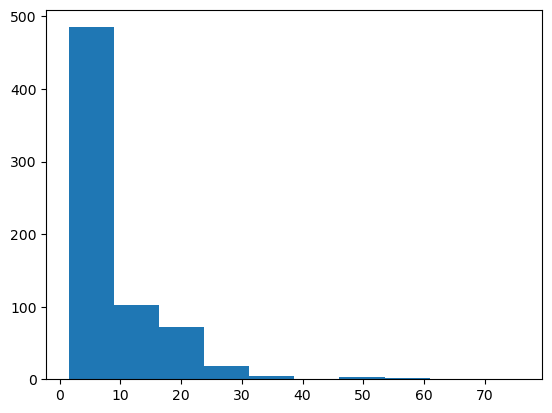

In [8]:
plt.figure()
plt.hist(sorted_error_df["H298 (kcal/mol)"])

# Make input files for calculations

In [22]:
closed_shell_smiles_list = sorted_error_df["closed_shell_smiles"].drop_duplicates(keep="first").values

In [23]:
# done: :20, 

smis_to_exclude = set([])

input_dict = {}
input_dict["level_of_theory"] = "cbs-qb3"
input_dict["project"] = "project"
input_dict["species"] = []
for smi in closed_shell_smiles_list[20:50]:
    
    if smi not in smis_to_exclude:
        spc_dict = {}
        spc_dict["charge"] = 0
        spc_dict["label"] = smi
        spc_dict["multiplicity"] = 1
        spc_dict["smiles"] = smi

        input_dict["species"].append(spc_dict)
    
input_dict

{'level_of_theory': 'cbs-qb3',
 'project': 'project',
 'species': [{'charge': 0,
   'label': 'C=C1C=C=C1C',
   'multiplicity': 1,
   'smiles': 'C=C1C=C=C1C'},
  {'charge': 0, 'label': 'C1=CO1', 'multiplicity': 1, 'smiles': 'C1=CO1'},
  {'charge': 0,
   'label': 'O=C=C(O)OO',
   'multiplicity': 1,
   'smiles': 'O=C=C(O)OO'},
  {'charge': 0,
   'label': 'OC=C(O)OO',
   'multiplicity': 1,
   'smiles': 'OC=C(O)OO'},
  {'charge': 0,
   'label': 'C=CC(O)C=O',
   'multiplicity': 1,
   'smiles': 'C=CC(O)C=O'},
  {'charge': 0,
   'label': 'CC1=C(O)OOC1',
   'multiplicity': 1,
   'smiles': 'CC1=C(O)OOC1'},
  {'charge': 0,
   'label': 'O=C1CC=CC1O',
   'multiplicity': 1,
   'smiles': 'O=C1CC=CC1O'},
  {'charge': 0,
   'label': 'CC1=C(O)OC1',
   'multiplicity': 1,
   'smiles': 'CC1=C(O)OC1'},
  {'charge': 0,
   'label': 'O=CC(O)=C(O)O',
   'multiplicity': 1,
   'smiles': 'O=CC(O)=C(O)O'},
  {'charge': 0,
   'label': 'C=C1CC=CC1=O',
   'multiplicity': 1,
   'smiles': 'C=C1CC=CC1=O'},
  {'charge': 0

In [24]:
project_dir = Path("/home/gridsan/hwpang/Jobs/QMCalcs/calculations/radical_tree_20-49_20231220")

project_dir.mkdir(exist_ok=True)

with open(project_dir / Path("input.yml"), "w") as f:
    yaml.dump(input_dict, f)